## Telecom Political Contributions: Analysis
----

In this project, I analyse contributions made by Comcast, Verizon, and AT&T to 115th congress individuals and PACs from 1989 - 2017. I also attemp to predict association between contributions and congressperson voting behavior in regards to Net Neutrality. The companies donated indirectly through associated PACs and members. This data is available on OpenSecrets.org. 

In [1]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## dataset url = https://www.opensecrets.org/featured-datasets/8

In [3]:
## initialize dataset
t_df = pd.read_csv('telecom.csv')

In [4]:
## dataset information
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 535 non-null    object 
 1   Chamber                              535 non-null    object 
 2   Party                                535 non-null    object 
 3   District                             535 non-null    object 
 4   Total                                535 non-null    object 
 5   Dems                                 535 non-null    object 
 6   Repubs                               535 non-null    object 
 7   Comcast Corp                         535 non-null    object 
 8   AT&T Inc                             535 non-null    object 
 9   Verizon Communications               535 non-null    object 
 10  March 2017 Vote on Internet Privacy  535 non-null    object 
 11  Unnamed: 11                     

In [5]:
## first 5 rows of the dataset
t_df.head()

,Name,Chamber,Party,District,Total,Dems,Repubs,Comcast Corp,AT&T Inc,Verizon Communications,March 2017 Vote on Internet Privacy,Unnamed: 11,Unnamed: 12
0,"McCain, John",Senate,R,AZS1,"$794,881",$0,"$794,881","$121,902","$477,088","$195,891",Yea,NaN,NaN
1,"Hoyer, Steny H",House,D,MD05,"$659,490","$659,490",$0,"$222,100","$249,150","$188,240",Nay,NaN,This table lists contributions from Comcast Co...
2,"Upton, Fred",House,R,MI06,"$631,000",$0,"$631,000","$222,200","$228,600","$180,200",Yea,NaN,NaN
3,"Blunt, Roy",Senate,R,MOS1,"$503,133",$0,"$503,133","$152,100","$192,675","$158,358",Yea,NaN,NaN
4,"Barton, Joe",House,R,TX06,"$495,309",$0,"$495,309","$131,000","$233,509","$130,800",Yea,NaN,NaN


In [6]:
## drop unnecessary columns
t_df = t_df.drop(['Unnamed: 11'], axis = 1)
t_df = t_df.drop(['Unnamed: 12'], axis = 1)

In [7]:
t_df

,Name,Chamber,Party,District,Total,Dems,Repubs,Comcast Corp,AT&T Inc,Verizon Communications,March 2017 Vote on Internet Privacy
0,"McCain, John",Senate,R,AZS1,"$794,881",$0,"$794,881","$121,902","$477,088","$195,891",Yea
1,"Hoyer, Steny H",House,D,MD05,"$659,490","$659,490",$0,"$222,100","$249,150","$188,240",Nay
2,"Upton, Fred",House,R,MI06,"$631,000",$0,"$631,000","$222,200","$228,600","$180,200",Yea
3,"Blunt, Roy",Senate,R,MOS1,"$503,133",$0,"$503,133","$152,100","$192,675","$158,358",Yea
4,"Barton, Joe",House,R,TX06,"$495,309",$0,"$495,309","$131,000","$233,509","$130,800",Yea
...,...,...,...,...,...,...,...,...,...,...,...
530,"Jayapal, Pramila",House,D,WA07,"$1,000","$1,000",$0,$0,$750,$250,Nay
531,"Shea-Porter, Carol",House,D,NH01,$99,$99,$0,$82,$12,$5,Nay
532,"Davidson, Warren",House,R,OH08,$0,$0,$0,$0,$0,$0,Nay
533,"Gianforte, Greg",House,R,MT01,$0,$0,$0,$0,$0,$0,Not Voting


In [8]:
## check for missing values
print("missing values:", t_df.isnull().values.any())

missing values: False


In [9]:
## data cleaning
t_df['Name'] = (t_df.Name.str.split()
              .apply(lambda x: ', '.join(x[::-1]).rstrip(','))
              .where(t_df['Name'].str.contains(','), t_df['Name'])
              .str.replace(',','') )

In [10]:
## data cleaning
t_df['Total'] = t_df['Total'].str.replace(',', '')
t_df['Total'] = t_df['Total'].str.replace('$', '')

t_df['Total'] = t_df['Total'].astype(int)

In [11]:
## data cleaning
t_df['Dems'] = t_df['Dems'].str.replace(',', '')
t_df['Dems'] = t_df['Dems'].str.replace('$', '')

t_df['Dems'] = t_df['Dems'].astype(int)

In [12]:
## data cleaning
t_df['Repubs'] = t_df['Repubs'].str.replace(',', '')
t_df['Repubs'] = t_df['Repubs'].str.replace('$', '')

t_df['Repubs'] = t_df['Repubs'].astype(int)

In [13]:
## data cleaning
t_df['Comcast Corp'] = t_df['Comcast Corp'].str.replace(',', '')
t_df['Comcast Corp'] = t_df['Comcast Corp'].str.replace('$', '')

t_df['Comcast Corp'] = t_df['Comcast Corp'].astype(int)

In [14]:
## data cleaning
t_df['AT&T Inc'] = t_df['AT&T Inc'].str.replace(',', '')
t_df['AT&T Inc'] = t_df['AT&T Inc'].str.replace('$', '')

t_df['AT&T Inc'] = t_df['AT&T Inc'].astype(int)

In [15]:
## data cleaning
t_df['Verizon Communications'] = t_df['Verizon Communications'].str.replace(',', '')
t_df['Verizon Communications'] = t_df['Verizon Communications'].str.replace('$', '')

t_df['Verizon Communications'] = t_df['Verizon Communications'].astype(int)

In [16]:
## basic descriptive statistics
t_desc = t_df['Total'].describe()
c_desc = t_df['Comcast Corp'].describe()
a_desc = t_df['AT&T Inc'].describe()
v_desc = t_df['Verizon Communications'].describe() 

print(t_desc)

count       535.000000
mean      85937.456075
std       97965.453242
min           0.000000
25%       23750.000000
50%       52500.000000
75%      113300.000000
max      794881.000000
Name: Total, dtype: float64


In [17]:
print(c_desc)

count       535.000000
mean      27849.663551
std       35321.868029
min           0.000000
25%        6375.000000
50%       15000.000000
75%       33750.000000
max      222200.000000
Name: Comcast Corp, dtype: float64


In [18]:
print(a_desc)

count       535.000000
mean      37076.671028
std       44727.283309
min           0.000000
25%        8900.000000
50%       22302.000000
75%       50103.000000
max      477088.000000
Name: AT&T Inc, dtype: float64


In [19]:
print(v_desc)

count       535.000000
mean      21011.121495
std       30194.091394
min           0.000000
25%        3500.000000
50%       11000.000000
75%       25500.000000
max      216727.000000
Name: Verizon Communications, dtype: float64


Included above are descriptive statistics of 518 contributions.

Text(0.5, 1.0, 'Top 10 Recipients')

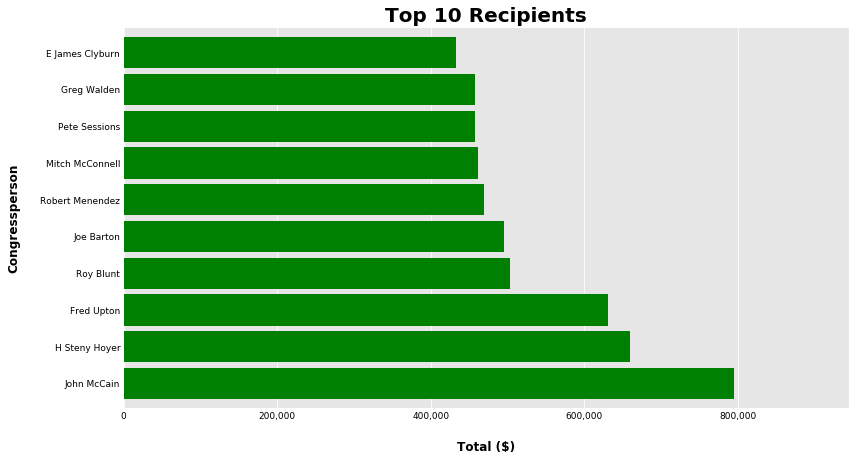

In [20]:
## visualize ten largest recipients
sums = t_df.groupby('Name')['Total'].sum().nlargest(10)
ax = sums.plot(kind='barh', figsize=(13, 7), color='green', zorder=1, width=0.85)

ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='none', alpha=0.3, color='#eeeeee', zorder=1)

ax.set_xlabel("Total ($)", labelpad=20, weight='bold', size=12)

ax.set_ylabel("Congressperson", labelpad=20, weight='bold', size=12)

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

def nice_axes(ax):
    ax.set_facecolor('.9')
    ax.tick_params(labelsize=9, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)

plt.title("Top 10 Recipients", weight='bold', size=20)

In [29]:
## sort yea votes = 1 & nay = 0, remove non votes
t_df = t_df[t_df['March 2017 Vote on Internet Privacy']!= 'Not Voting']
t_df['March 2017 Vote on Internet Privacy']

t_df['Votes'] = np.where(t_df['March 2017 Vote on Internet Privacy'] == 'Yea', 1, 0)

t_df['Parties'] = np.where(t_df['Party'] == 'R', 1, 0)

t_df['Votes'] = t_df['Votes'].astype(int)

t_df['Parties'] = t_df['Parties'].astype(int)

In [22]:
t_df.reset_index()

,index,Name,Chamber,Party,District,Total,Dems,Repubs,Comcast Corp,AT&T Inc,Verizon Communications,March 2017 Vote on Internet Privacy,Votes,Parties
0,0,John McCain,Senate,R,AZS1,794881,0,794881,121902,477088,195891,Yea,1,1
1,1,H Steny Hoyer,House,D,MD05,659490,659490,0,222100,249150,188240,Nay,0,0
2,2,Fred Upton,House,R,MI06,631000,0,631000,222200,228600,180200,Yea,1,1
3,3,Roy Blunt,Senate,R,MOS1,503133,0,503133,152100,192675,158358,Yea,1,1
4,4,Joe Barton,House,R,TX06,495309,0,495309,131000,233509,130800,Yea,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,529,Chellie Pingree,House,D,ME01,1250,1250,0,250,1000,0,Nay,0,0
514,530,Pramila Jayapal,House,D,WA07,1000,1000,0,0,750,250,Nay,0,0
515,531,Carol Shea-Porter,House,D,NH01,99,99,0,82,12,5,Nay,0,0
516,532,Warren Davidson,House,R,OH08,0,0,0,0,0,0,Nay,0,1


In [23]:
## split into train and test sets
x = t_df.iloc[:, 4:5].values
y = t_df.iloc[:, 11:12].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [24]:
## retreive the accuracy score using DecisionTreeClassifier 
classifier = DecisionTreeClassifier(max_depth = 20)
classifier = classifier.fit(x_train, y_train)
predicted_value = classifier.predict(x_test)
decision_tree = metrics.accuracy_score(y_test, predicted_value) * 100
print("\nThe DecisionTreeClassifier accuracy score is {}".format(decision_tree))


The DecisionTreeClassifier accuracy score is 44.230769230769226


There does not seem to be any prediction ability between total contribution recieved and voting behavior. 

In [25]:
## split into train and test sets
x_1 = t_df.iloc[:, 12:13].values
y_1 = t_df.iloc[:, 11:12].values

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size = 0.2)

In [26]:
## retreive the accuracy score using DecisionTreeClassifier 
classifier = DecisionTreeClassifier(max_depth = 2)
classifier = classifier.fit(x_train_1, y_train_1)
predicted_value_1 = classifier.predict(x_test_1)
decision_tree_1 = metrics.accuracy_score(y_test_1, predicted_value_1) * 100
print("\nThe DecisionTreeClassifier accuracy score is {}".format(decision_tree_1))


The DecisionTreeClassifier accuracy score is 98.07692307692307


There is prediction ability between party affiliation and vote decision.

In [27]:
## retrieve correlation coefficients
one_r = t_df['Votes'] == 1
two_r = t_df['Party'] == 'R'

one_d = t_df['Votes'] == 1
two_d = t_df['Party'] == 'D'


dd_correlation = one_d.corr(two_d)
rr_correlation = one_r.corr(two_r)
print("\nThe correlation coefficient for republicans to vote yes was {}".format(rr_correlation))
print("\nThe correlation coefficient for democrats to vote yes was {}".format(dd_correlation))


The correlation coefficient for republicans to vote yes was 0.9244300374896335

The correlation coefficient for democrats to vote yes was -0.9171372360590141


Text(0.5, 1.0, 'Total Contribution by Party')

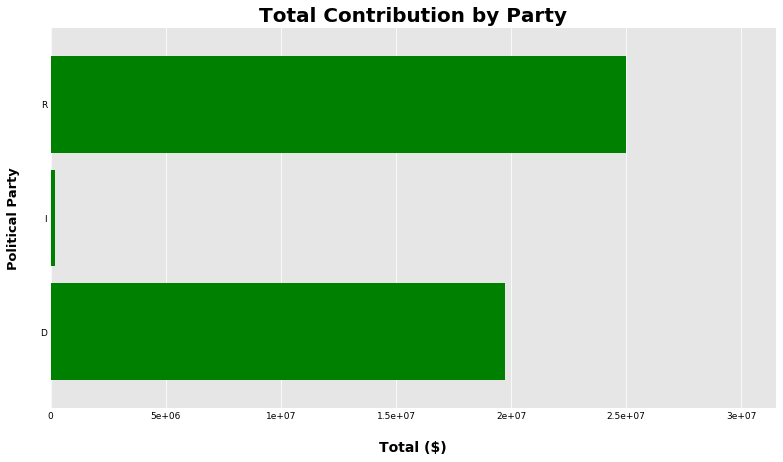

In [28]:
## visualize total contributions to each party
sums = t_df.groupby('Party')['Total'].sum()
ax = sums.plot(kind='barh', figsize=(13, 7), color='green', zorder=1, width=0.85)

ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='none', alpha=0.3, color='#eeeeee', zorder=1)

ax.set_xlabel("Total ($)", labelpad=20, weight='bold', size=14)

ax.set_ylabel("Political Party", labelpad=20, weight='bold', size=13)

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

def nice_axes(ax):
    ax.set_facecolor('.9')
    ax.tick_params(labelsize=9, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)

plt.title("Total Contribution by Party", weight='bold', size=20)

Republicans had the highest contribution total.